# Proyecto final Big Data
Por:
* Andres Gregori 



In [ ]:
#Importamos las librerias a usar asi como los complementos de algunas
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import pandasql as dfsql
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/andrewgregory/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Descargamos el dataset ignorando las columnas inservibles
col_list=['A2','A3','A4','A6','A7','A8','A9']
data=pd.read_csv('Comments.csv',engine='python',encoding='utf-8',usecols=col_list)

In [ ]:
#Convertimos la columna A7 a timestamp
data.A7=pd.to_datetime(data.A7,unit='s')
#Como el timestamp esta codificado en Unix

In [ ]:
data['A9']=data['A9'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   A2      568454 non-null  object        
 1   A3      568454 non-null  object        
 2   A4      568438 non-null  object        
 3   A6      568454 non-null  int64         
 4   A7      568454 non-null  datetime64[ns]
 5   A8      568427 non-null  object        
 6   A9      568454 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(1), object(4)
memory usage: 39.3+ MB


In [ ]:
#Pregunta 1 Conteo de usuarios con opiniones
data.A3.nunique() #Tenemos 256059 usuarios con opiniones

256059

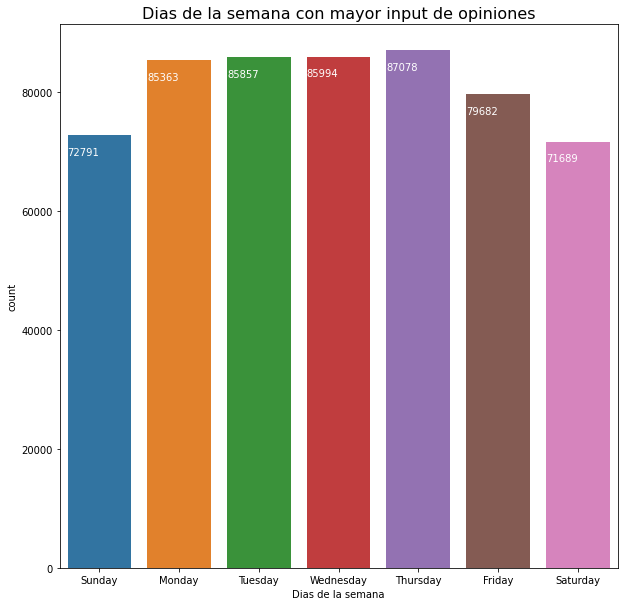

In [ ]:
#Pregunta 2 Horario/dia en el que se deja el comentario
data['day_o_week']=data.A7.dt.day_name()
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]#Para poner en orden la grafica
fig, ax =plt.subplots(figsize=(10,10))
ax=sns.countplot(data=data,x='day_o_week',order=order)
ax.set_title('Dias de la semana con mayor input de opiniones', fontsize=16)
ax.set_xlabel('Dias de la semana')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)

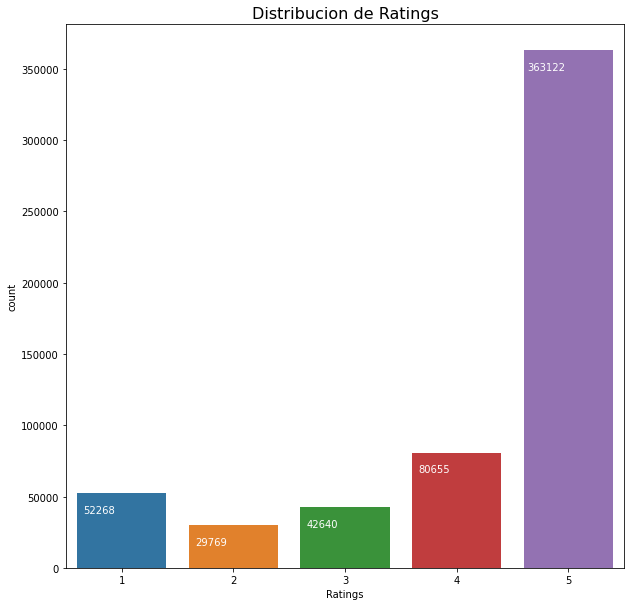

In [ ]:
#Pregunta 3: DIstribucion de Ratings
fig, ax=plt.subplots(figsize=(10,10))
ax=sns.countplot(data=data,x='A6')
ax.set_title('Distribucion de Ratings', fontsize=16)
ax.set_xlabel('Ratings')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)


In [ ]:
#Estas funciones sirven para poder analizar el sentimiento del texto de la review
def clean_Text(text):# Esta limpia el texto eliminando texto de las regular expressions
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)[-()\[\]\"“'”’#/@;:<>{}`+=~|.!?,]", " ",
                           text).split())
def sentiment_analyzer(text):#Esta utiliza TextBlob para calcular la polaridad del comentario
    analysis=TextBlob(clean_Text(text))
    return analysis.sentiment.polarity

In [ ]:
#Pregunta 4: Sentimiento de cada comentario
data['Sentiment']=pd.Series(sentiment_analyzer(opinion) for opinion in data.A9)
data.head()

,A2,A3,A4,A6,A7,A8,A9,day_o_week,Sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Wednesday,0.450000
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Friday,-0.033333
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Monday,0.133571
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Monday,0.166667
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Sunday,0.483333


In [ ]:
data['Sentiment'].describe()

count    568454.000000
mean          0.235499
std           0.216135
min          -1.000000
25%           0.105556
50%           0.227083
75%           0.361667
max           1.000000
Name: Sentiment, dtype: float64

Text(0.5, 0, 'Sentimiento')

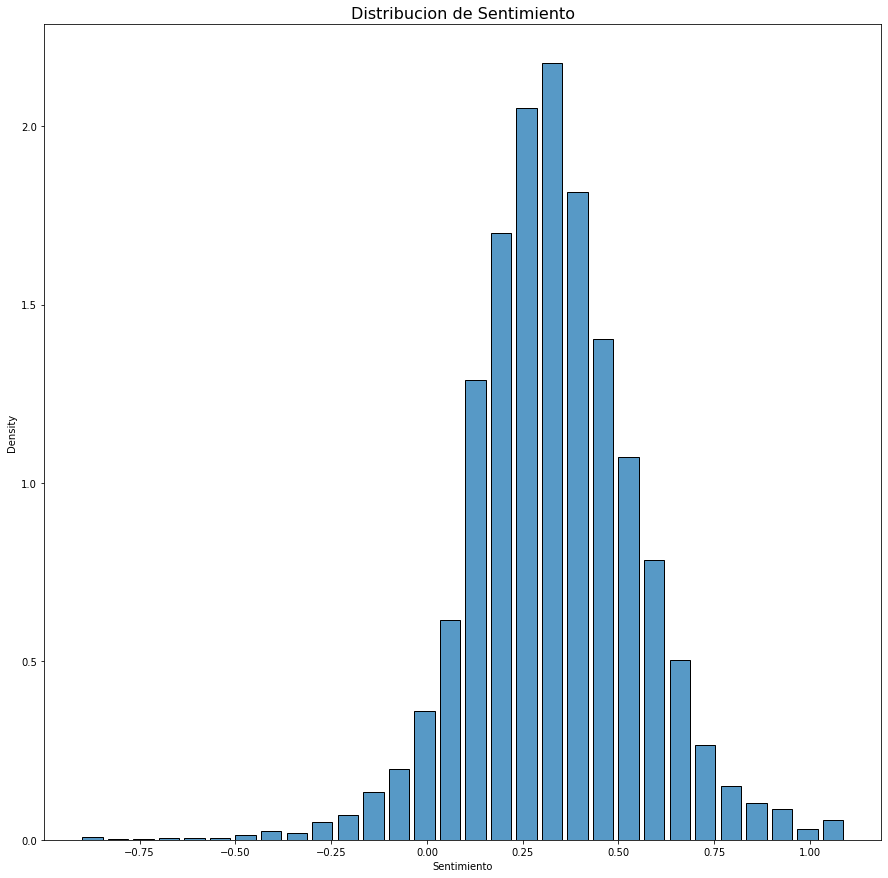

In [ ]:
#fig = px.histogram(data, x="Sentiment",title='Distribucion de comentarios', labels={'Sentiment':'Respuestas'})
#fig.show()
fig, ax=plt.subplots(figsize=(15,15))
ax=sns.histplot(data=data, x='Sentiment',bins=30,shrink=0.8,stat='density')
ax.set_title('Distribucion de Sentimiento', fontsize=16)
ax.set_xlabel('Sentimiento')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   A2          568454 non-null  object        
 1   A3          568454 non-null  object        
 2   A4          568438 non-null  object        
 3   A6          568454 non-null  int64         
 4   A7          568454 non-null  datetime64[ns]
 5   A8          568427 non-null  object        
 6   A9          568454 non-null  category      
 7   day_o_week  568454 non-null  object        
 8   Sentiment   568454 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 47.9+ MB


In [ ]:
#Pregunta 5: Producto con mas opiniones
q_5=data.groupby(['A2']).agg({'A2':'count','A6':'mean','Sentiment':'mean'})

In [ ]:
q_5.nlargest(10,'A2')

,A2,A6,Sentiment
A2,,,
B007JFMH8M,913,4.582694,0.354777
B0026RQTGE,632,4.588608,0.240500
B002QWHJOU,632,4.588608,0.240500
B002QWP89S,632,4.588608,0.240500
B002QWP8H0,632,4.588608,0.240500
B003B3OOPA,623,4.739968,0.300882
B001EO5Q64,567,4.746032,0.304385
B000VK8AVK,564,4.310284,0.259562
B0013NUGDE,564,4.310284,0.259562


In [ ]:
def get_most_used_word (df, word,column):#Funcion que toma el cumulo de opiniones en un string para analizarlo
    opinion=df.loc[df[column]==word,['A9']]
    l=list(opinion['A9'].tolist())
    for text in l:
        text=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)[-()\[\]\"“'”’#/@;:<><br /><br />{}`+=~|.!?,]", " ",text)
    r=' '.join(l)
    r=r.replace('<br /><br />','')
    r=r.replace('</a>','')
    r=r.replace('\\','')
    r=r.replace('--',' ')
    return rAdministración


    
    

In [ ]:
from nltk import FreqDist
nltk.download('punkt')
opinion=get_most_used_word(data,'B007JFMH8M','A2')#Usamos el producto con mas reviews
opinion=opinion.lower()
wordsClean = re.sub(r"[-()\[\]\"“'”’#/@;:<>{}`+=~|.!?,]", "", opinion)
words=nltk.word_tokenize(wordsClean)#Tokenizamos
#Quitaremos las stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
#remove stop words
stop = stopwords.words('english')
word_tokens = [word for word in words if word.lower() not in stop]
freq=FreqDist(word_tokens)
freq.most_common(30)


[nltk_data] Downloading package punkt to
[nltk_data]     /home/andrewgregory/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andrewgregory/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('cookies', 835),
 ('cookie', 824),
 ('soft', 693),
 ('oatmeal', 479),
 ('good', 344),
 ('quaker', 319),
 ('like', 295),
 ('love', 288),
 ('taste', 288),
 ('great', 288),
 ('influenster', 239),
 ('one', 234),
 ('loved', 228),
 ('baked', 225),
 ('raisins', 197),
 ('delicious', 190),
 ('kids', 189),
 ('try', 187),
 ('received', 186),
 ('really', 185),
 ('chewy', 184),
 ('raisin', 175),
 ('would', 170),
 ('snack', 165),
 ('box', 162),
 ('buy', 145),
 ('go', 133),
 ('mom', 128),
 ('definitely', 125),
 ('sample', 119)]

In [ ]:
#Pregunta 7: Usuario que mas comenta
#Usamos la misma metodologia para agrupar como en la pregunta 5 
q_7=data.groupby(['A3']).agg({'A3':'count','A6':'mean','Sentiment':'mean'})
q_7.nlargest(10,'A3')

,A3,A6,Sentiment
A3,,,
A3OXHLG6DIBRW8,448,4.535714,0.252111
A1YUL9PCJR3JTY,421,4.494062,0.190014
AY12DBB0U420B,389,4.647815,0.226588
A281NPSIMI1C2R,365,4.841096,0.242492
A1Z54EM24Y40LL,256,4.453125,0.229496
A1TMAVN4CEM8U8,204,4.833333,0.145273
A2MUGFV2TDQ47K,201,3.751244,0.167792
A3TVZM3ZIXG8YW,199,1.000000,0.070179
A3PJZ8TU8FDQ1K,178,4.601124,0.195831


In [ ]:
data.loc[data['A3']=='A3OXHLG6DIBRW8']

,A2,A3,A4,A6,A7,A8,A9,day_o_week,Sentiment
369,B002O3VHXU,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,2010-08-19,Very Smooth Coffee - Highly Recommended,"Green Mountain ""Nantucket Blend"" K-Cups make a...",Thursday,0.243286
813,B004ET7MG8,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",2,2010-04-26,Odd Fake Flavor - Not Recommended,"Trident ""Strawberry Twist"" sugarless gum is ve...",Monday,-0.084573
3306,B005K4Q1VI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,2011-11-16,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...,Wednesday,0.382307
3416,B005K4Q1VI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,2011-11-16,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...,Wednesday,0.353717
3926,B000VSDFRG,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,2009-03-16,Great Diabetic Friendly Candy - Highly Recomme...,"Hershey ""Sugar Free Caramel Filled Chocolates""...",Monday,0.250938
...,...,...,...,...,...,...,...,...,...
562279,B004HOSGWE,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,2012-02-19,Great Spicy Snack - Highly Recommended,The Blue Diamond Jalapeno Smokehouse Almonds a...,Sunday,0.295000
563973,B001XSMANI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,2010-07-18,Great Tasting and a Great Value - Highly Recom...,Kirkland Jelly Beans are a great value and all...,Sunday,0.225000
564414,B001D3LUP2,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",3,2009-05-25,Good Tasting Sugarfree Gum - Flavor Tapers Off...,"Wrigley's Elixir Gum is good tasting, but onl...",Monday,0.208333
567686,B005K4Q68Q,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,2011-11-16,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...,Wednesday,0.382307


In [ ]:
opinion=get_most_used_word(data,'A3OXHLG6DIBRW8','A3')#Usamos el producto con mas reviews
opinion=opinion.lower()
wordsClean = re.sub(r"[-()\[\]\"“'”’#/@;:*<>{}`+=~|.!?,]", "", opinion)
words=nltk.word_tokenize(wordsClean)#Tokenizamos
#Quitaremos las stopwords
nltk.download('stopwords')
word_tokens = [word for word in words if word.lower() not in stop]
freq=FreqDist(word_tokens)
freq.most_common(30)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andrewgregory/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('good', 529),
 ('flavor', 329),
 ('tasting', 304),
 ('great', 227),
 ('like', 223),
 ('sugar', 205),
 ('recommendedcfh', 181),
 ('coffee', 172),
 ('since', 164),
 ('pack', 155),
 ('also', 155),
 ('cup', 149),
 ('diabetic', 148),
 ('carbs', 141),
 ('really', 133),
 ('one', 128),
 ('chocolate', 125),
 ('jelly', 118),
 ('2', 116),
 ('wife', 115),
 ('hot', 115),
 ('snack', 115),
 ('taste', 114),
 ('recommended', 112),
 ('stars', 111),
 ('free', 109),
 ('type', 100),
 ('pasta', 99),
 ('flavors', 97),
 ('kcups', 94)]

In [ ]:
#Pregunta 8-10
#Para clasificar el texto vamos a tomar el texto de la review con rating en 1 y en 5
rtg_1=data.loc[(data['A6']==1)]
rtg_5=data.loc[(data['A6']==5)]

In [ ]:
#Funciones a mappear para hacer stemming y lemmatizacion vamos a utilizar el Word Net Lemmatizer
#Crearemos otra funcion parecida al preprocessing que haciamos con anterioridad
#ELiminamos las stopwords con 2 filtros: que no esten en la lista y que la longitud de la palabra sea mayor a 3
stemmer=SnowballStemmer("english")
def stem_lem(txt):
    return stemmer.stem(WordNetLemmatizer().lemmatize(txt,pos='v'))
def preproc(txt):
    r=[]
    for word in gensim.utils.simple_preprocess(txt):
        if word not in gensim.parsing.preprocessing.STOPWORDS and len(word) > 3:
            r.append(stem_lem(word))
    return r


In [ ]:
def topic_classifier(df):
    process_text=pd.Series(preproc(a) for a in df['A9'])#process_text=df['A9'].map(preproc)
    dictionary = gensim.corpora.Dictionary(process_text)
    #Quitamos los outliers
    dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    #Creamos una bag of words para poder utilizar el LDA 
    bow = [dictionary.doc2bow(doc) for doc in process_text]
    lda_model = gensim.models.LdaMulticore(bow, num_topics=10, id2word=dictionary, passes=2, workers=2)
    #Escribimos los topicos en los que lo clasifican 
    for idx, topic in lda_model.print_topics(-1):
        print('Topic: {} \nWords: {}'.format(idx, topic))
    

In [ ]:
#Pregunta 9: Categorias con rating de 5 
#Para la clasificacion para el rating en 5
topic_classifier(rtg_5.sample(n=100000))

Topic: 0 
Words: 0.020*"like" + 0.018*"flavor" + 0.018*"chip" + 0.016*"tast" + 0.014*"great" + 0.013*"good" + 0.013*"sauc" + 0.012*"love" + 0.011*"cook" + 0.009*"gluten"
Topic: 1 
Words: 0.096*"coffe" + 0.031*"flavor" + 0.023*"tast" + 0.022*"like" + 0.015*"good" + 0.014*"great" + 0.014*"love" + 0.014*"strong" + 0.013*"cup" + 0.013*"tri"
Topic: 2 
Words: 0.021*"salt" + 0.010*"fresh" + 0.009*"tast" + 0.009*"like" + 0.008*"product" + 0.008*"packag" + 0.007*"pack" + 0.007*"come" + 0.006*"color" + 0.006*"look"
Topic: 3 
Words: 0.017*"drink" + 0.016*"water" + 0.014*"tast" + 0.014*"work" + 0.013*"like" + 0.013*"help" + 0.012*"popcorn" + 0.011*"coconut" + 0.011*"good" + 0.010*"energi"
Topic: 4 
Words: 0.052*"treat" + 0.042*"love" + 0.018*"dog" + 0.014*"like" + 0.014*"chew" + 0.012*"great" + 0.011*"littl" + 0.010*"time" + 0.010*"size" + 0.009*"small"
Topic: 5 
Words: 0.035*"order" + 0.026*"product" + 0.018*"time" + 0.017*"great" + 0.016*"packag" + 0.014*"love" + 0.013*"arriv" + 0.013*"good" + 0

In [ ]:
#Pregunta 10 Categorias de comentarios con rating de 1
#Haremos la clasificacion para el rating en 1
topic_classifier(rtg_1)

Topic: 0 
Words: 0.030*"food" + 0.013*"babi" + 0.012*"time" + 0.010*"think" + 0.009*"month" + 0.009*"like" + 0.009*"go" + 0.009*"start" + 0.008*"product" + 0.008*"give"
Topic: 1 
Words: 0.042*"product" + 0.026*"ingredi" + 0.018*"sugar" + 0.013*"contain" + 0.012*"natur" + 0.011*"organ" + 0.010*"list" + 0.009*"food" + 0.009*"label" + 0.008*"corn"
Topic: 2 
Words: 0.065*"food" + 0.027*"eat" + 0.015*"thing" + 0.015*"popcorn" + 0.015*"diet" + 0.015*"cat" + 0.013*"scienc" + 0.013*"ingredi" + 0.012*"littl" + 0.011*"think"
Topic: 3 
Words: 0.039*"tast" + 0.030*"like" + 0.019*"flavor" + 0.015*"cooki" + 0.014*"product" + 0.012*"good" + 0.011*"tri" + 0.010*"buy" + 0.009*"think" + 0.008*"chocol"
Topic: 4 
Words: 0.013*"work" + 0.013*"review" + 0.011*"product" + 0.010*"milk" + 0.010*"buy" + 0.010*"tri" + 0.009*"grain" + 0.008*"think" + 0.008*"like" + 0.008*"green"
Topic: 5 
Words: 0.024*"treat" + 0.019*"product" + 0.018*"dog" + 0.017*"order" + 0.016*"food" + 0.013*"can" + 0.012*"amazon" + 0.011*"ti